## Lending Club Case Study

The aim is to identify patterns which indicate if a person is likely to default which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

We will use EDA to understand how consumer attributes and loan attributes influence the tendency of default. We need to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

The analysis can be divided into following steps
1. Data loading and u derstanding
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis comprising Univariate Analysis, Bivariate Analysis, Segmented Univariate Analysis and Multivariate Analysis

In [1]:
## import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
loan_df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
loan_df.shape

(39717, 111)

## Data Cleaning

##### This dataset contains 39717 rows and 111 columns. Out of these 111 columns, many columns have null values in majority. 

In [5]:
# Total percentage of null values in the data
(loan_df.isnull().sum().sum())/(loan_df.shape[0]*loan_df.shape[1])

0.5133989643393677

### Handling null values
#####  51.33% of the values in the overall data are null values. So, it becomes necessary to deal with these null values with utmost care as they can significantly affect our results.

In [6]:
# Creating a dataframe to display percentage of null values in each column
percent_null_values = pd.DataFrame()
percent_null_values['Percentage of null values']=['30% or less','40% or less','50% or less','60% or less','70% or less']

thirty_percent = len(loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.3])
fourty_percent = len(loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.4])
fifty_percent = len(loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.5])
sixty_percent = len(loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.6])
seventy_percent = len(loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.7])


percent_null_values['No.of columns'] = [thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
percent_null_values

,Percentage of null values,No.of columns
0,30% or less,53
1,40% or less,54
2,50% or less,54
3,60% or less,54
4,70% or less,55


##### We can decrease the total number of columns from 111 to 53 by considering only those columns which has null values less than 30%.

In [7]:
# Considering only those columns which have null values less than 30% in that particular column
df = loan_df[loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.3]]
df.shape

(39717, 53)

In [8]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### It seems there are multiple columns which are single valued, so verifying those with value_counts.

In [9]:
df['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [10]:
df['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [11]:
df['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [12]:
df['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [13]:
df['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [14]:
df['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [15]:
df['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [16]:
df['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [17]:
df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

##### Above Single valued columns will not contribute to our analysis so dropping these single valued column

In [18]:
df = df.drop(['pymnt_plan','collections_12_mths_ex_med','initial_list_status','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis = 1)

In [19]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [20]:
df.shape

(39717, 44)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [22]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
0.10%      58
66.70%     58
         ... 
10.17%      1
38.77%      1
7.43%       1
24.89%      1
0.12%       1
Name: revol_util, Length: 1089, dtype: int64

In [24]:
# We can see that employment length for 10 years or more has maximum counts but replacing with this value would be impractical.
# So Lets fill null values in employment length with 0 and format employment length column to have only numbers.
# Further only small percentage of values are replaced so it should not effect our results.
df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')

# Lets fill null values in public record bankruptcies with not known
df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

# Lets fill null values in revol_util with its mode
df.revol_util.fillna('0' , inplace = True)

# Lets remove % symbol from intrest rate column so that it can be used in calculations
df['revol_util'] = df['revol_util'].str.rstrip('%')

# Lets remove % symbol from intrest rate column so that it can be used in calculations
df['int_rate'] = df['int_rate'].str.rstrip('%')

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0


In [25]:
# Checking every column by running a for loop on top of 'object' columns.
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('-------------------------')

 36 months    29096
 60 months    10621
Name: term, dtype: int64
-------------------------
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.72      1
22.64      1
21.48      1
16.96      1
17.46      1
Name: int_rate, Length: 371, dtype: int64
-------------------------
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
-------------------------
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64
-------------------------
US Army                             134
Bank of America                     109
IBM                                  66
AT&T    

###### Dropping Columns that doesn't add value to our objective
 
Now we are left with 44 columns after removing columns with more than 30% null values and dropping single valued columns.

* Our objective is to identify driving factors behind loan defaulters. 
* Now in these 44 columns, there are several columns that would not add value to our analyis. 
* So we can safely remove such columns like 'id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'addr_state' as these   features doesn't contribute to loan defaulting in any way.
* Further Columns like 'acc_now_delinq', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_amnt', 'policy_code', 'tax_liens' are not so useful columns as seen in above column examination.

In [26]:
# After carefully observing the above output, we are dropping certain columns which are insignificant to our objective of analysis

df.drop(['member_id', 'url', 'emp_title','title', 'zip_code', 'addr_state', 'collection_recovery_fee'],axis=1,inplace=True)
df.shape

(39717, 37)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            39717 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [28]:
# Converting some numeric columns from object (as it contained associated symbols) to numeric for further analysis

cols1 = ['int_rate','emp_length', 'revol_util']
df[cols1] = df[cols1].apply(pd.to_numeric)

### Outlier Treatment
###### Outliers must be removed as it adversely affect our results

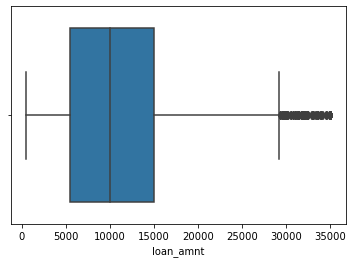

In [29]:
# best method for analysing outliers is boxplot
sns.boxplot(df['loan_amnt'])
plt.show()

* It s clearly observed that outliers are present and it should be removed.
* We can take an appropriate action through quantile information
* Considering 5% threshold for removing outliers

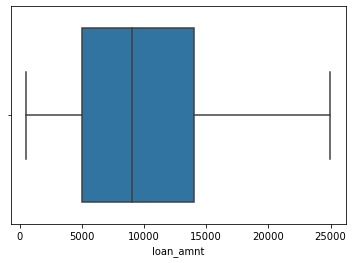

In [30]:
df = df[df['loan_amnt'] < df['loan_amnt'].quantile(0.95)]
sns.boxplot(df['loan_amnt'])
plt.show()

Observation
* It can be observed that outliers are significantly reduced.
* Similar treatment can be applied to other columns comprising numerical values

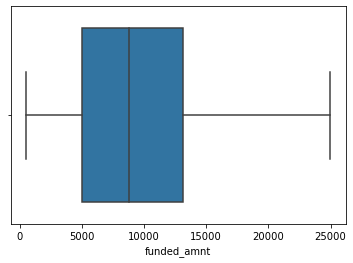

In [31]:
sns.boxplot(df['funded_amnt'])
plt.show()

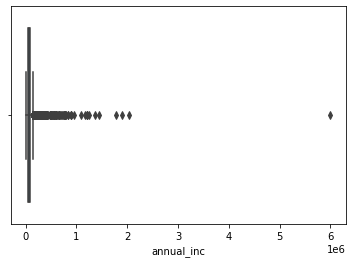

In [32]:
sns.boxplot(df['annual_inc'])
plt.show()

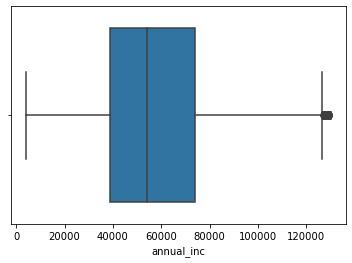

In [33]:
df = df[df['annual_inc'] < df['annual_inc'].quantile(0.95)]
sns.boxplot(df['annual_inc'])
plt.show()

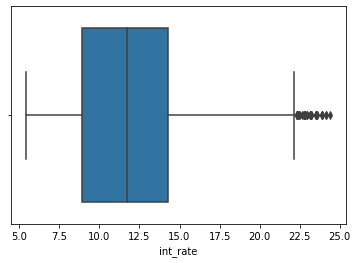

In [34]:
sns.boxplot(df['int_rate'])
plt.show()

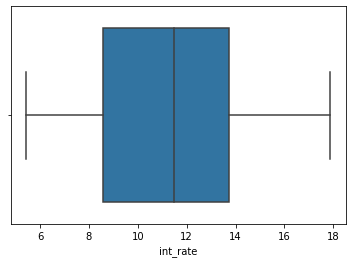

In [35]:
df = df[df['int_rate'] < df['int_rate'].quantile(0.95)]
sns.boxplot(df['int_rate'])
plt.show()

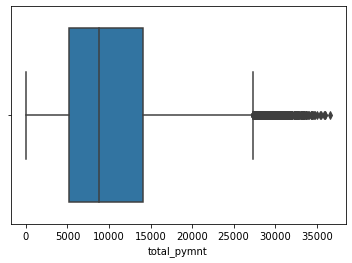

In [36]:
sns.boxplot(df['total_pymnt'])
plt.show()

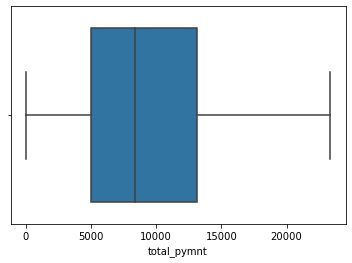

In [37]:
df = df[df['total_pymnt'] < df['total_pymnt'].quantile(0.95)]
sns.boxplot(df['total_pymnt'])
plt.show()

#### After Data cleaning lets have a look towards our objective 

In [38]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     26498
Charged Off     4291
Current          536
Name: loan_status, dtype: int64

In [39]:
(df.loan_status.value_counts()*100)/len(df)

Fully Paid     84.590583
Charged Off    13.698324
Current         1.711093
Name: loan_status, dtype: float64

##### We can see that fully paid comprises 84.5% and defaulters are 13.6%.
###### The 'current' ones are neither fully paid not defaulted, so let's get rid of the current loans as this wont contribute to our analysis 

In [40]:
df = df[df['loan_status'] != 'Current']
df['loan_status'].value_counts()

Fully Paid     26498
Charged Off     4291
Current            0
Name: loan_status, dtype: int64

# Univariate Analysis

###### Lets take a look on some of the important variables that concerns our objective

##### Quantitative Variables

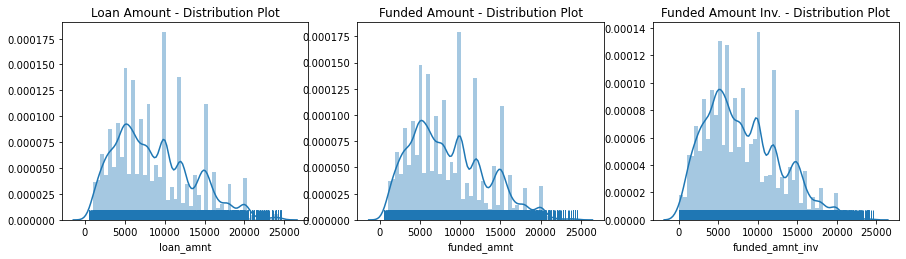

In [41]:
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
plt.title('Loan Amount - Distribution Plot')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df['funded_amnt'],rug = True)
plt.title('Funded Amount - Distribution Plot')

# subplot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(df['funded_amnt_inv'],rug = True)
plt.title('Funded Amount Inv. - Distribution Plot')

plt.show()

Observation: 
* Distribution of amounts for Loan Amount, Funded Amount and Funded Amount Investment looks very much similar.
* Hence, we can work with only loan amount column for rest of our analysis

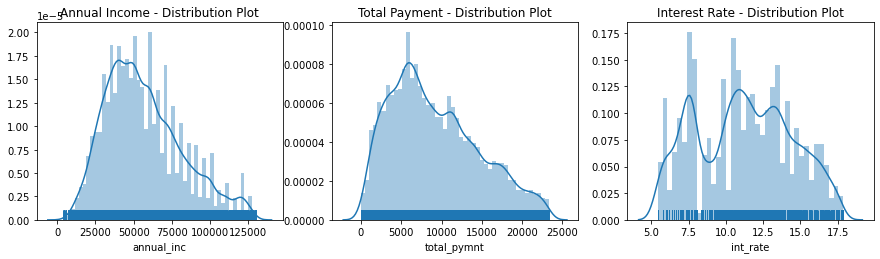

In [42]:
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df['annual_inc'],rug = True)
plt.title('Annual Income - Distribution Plot')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df['total_pymnt'],rug = True)
plt.title('Total Payment - Distribution Plot')

# subplot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(df['int_rate'],rug = True)
plt.title('Interest Rate - Distribution Plot')

plt.show()

Observation (This can be observed in above box plot as well)
* Maxium loan applicants have their annual income in range 30000-80000
* Most of the total payment are in range of 5000-13000
* Most of the Interest Rates on loans are in range of 10% - 15%

## Segemnted Univariate Analysis

##### Unordered Categorical Variables

In [43]:
# Purpose of loan

(df.purpose.value_counts()*100)/len(df)

debt_consolidation    45.152490
credit_card           13.219007
other                 10.877261
home_improvement       6.947286
major_purchase         6.122316
car                    4.524343
small_business         3.816298
wedding                2.543116
medical                1.900029
moving                 1.623957
vacation               1.133522
educational            0.980870
house                  0.893176
renewable_energy       0.266329
Name: purpose, dtype: float64

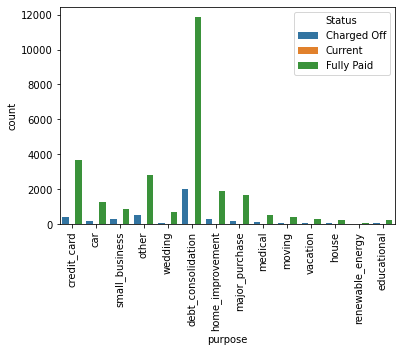

In [44]:
ax = sns.countplot(x="purpose",data=df,hue='loan_status')
plt.xticks(rotation=90)
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Current','Fully Paid']
ax.legend(h,labels,title='Status')   
plt.show()

Observations
* Most of the loans taken for debt consolidation(45.15%) and Credit card bill payment (13.21%)
* Other (10.8%) is also one of the main area where loans were taken and then the home improvement is another major reason (6.94%)

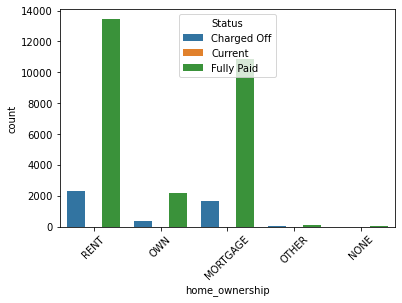

In [45]:
# Home Ownership

ax = sns.countplot(x="home_ownership",data=df,hue='loan_status')
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor=(1, 1))
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Current','Fully Paid']
ax.legend(h,labels,title='Status')   
plt.show()

Observations :
* Above plot shows that the applicant numbers are highest for those living in rented home 
* Next Highest applicants are those who mortgazed their home.
* Others have least numbers of applicants.

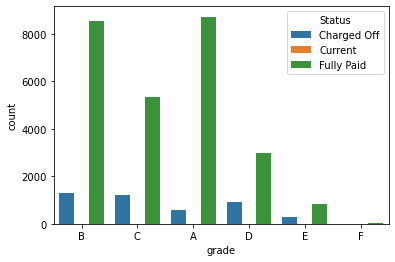

In [46]:
# Loan Grade 

ax = sns.countplot(x="grade",data=df,hue='loan_status')
plt.xticks(rotation=0)
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Current','Fully Paid']
ax.legend(h,labels,title='Status')   
plt.show()

Observations
* Number of loan applications is maximum for grade A and B. 
* Loan defaulters are comparatively less for grade A. 
* Number of loan applications then gradually decreases from B to F.

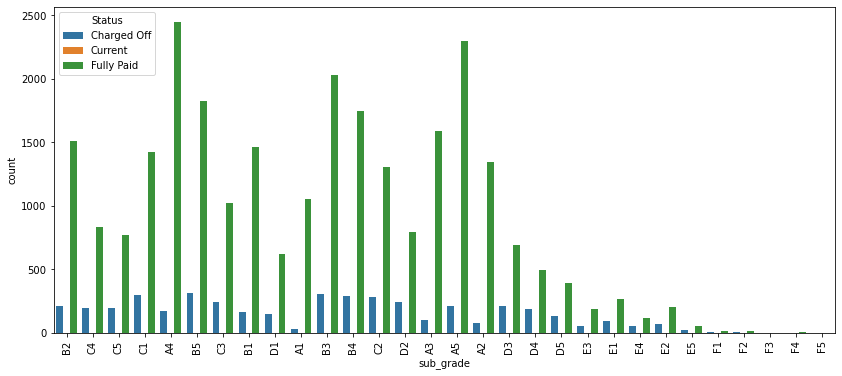

In [47]:
# Loan Sub Grade 
plt.figure(figsize=(14,6))
ax = sns.countplot(x="sub_grade",data=df,hue='loan_status')
plt.xticks(rotation=90)
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Current','Fully Paid']
ax.legend(h,labels,title='Status')   
plt.show()

Count of Loan applicants reduces from subgrades A to subgrades F

##### Ordered Categorical Variables

In [48]:
# Derive month and year columns separately using existing data to use it for further analysis.

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

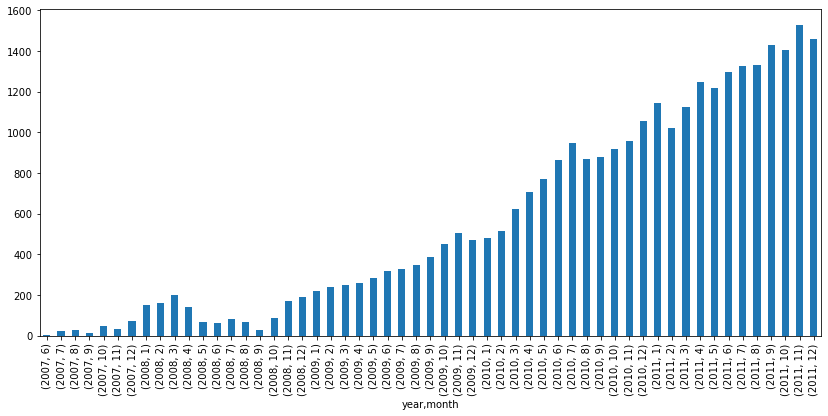

In [49]:
# Number of loans which were approved every year/month

plt.figure(figsize=(14,6))
df.groupby(['year','month']).id.count().plot(kind='bar')
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Fully Paid']
ax.legend(h,labels,title='Status')   
plt.show()

Observation 
* There is increase in count of loan application with each passing year.
* Above observation holds true except for May-October in the year 2008, reason for this can be recession. 
* Hence, increase in number of loan applications will add to increased number of charged off applications.

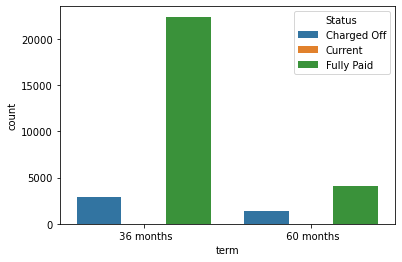

In [50]:
# Loan Paying Terms
ax = sns.countplot(x="term",data=df,hue='loan_status')
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Current','Fully Paid']
ax.legend(h,labels,title='Status')   
plt.show()

Observations :
* The plot suggests that loan repayment term of 36 months has higher count of loan applicant as compared to loan repayment term of 60 months.

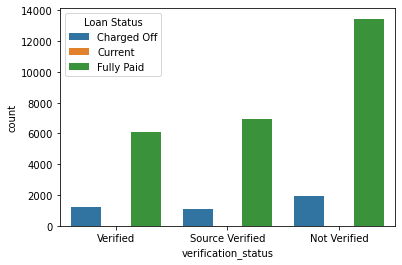

In [51]:
# verification_status
ax = sns.countplot(x="verification_status",data=df,hue='loan_status')
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Current','Fully Paid']
ax.legend(h,labels,title='Loan Status')   
plt.show()

Observation 
* Not verified loan applications are highest in numbers
* Verified loan applications are less in numbers

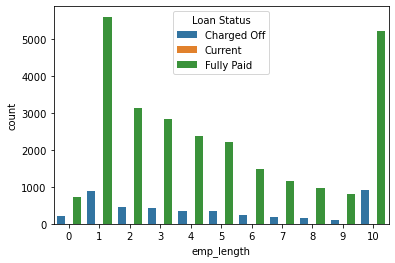

In [52]:
# Employment Length
ax = sns.countplot(x="emp_length",data=df,hue='loan_status')
h,l = ax.get_legend_handles_labels()
labels=['Charged Off', 'Current','Fully Paid']
ax.legend(h,labels,title='Loan Status')   
plt.show()

Observation
* Less count of loan applications is seen for employment length less than an year
* Maximum count of laon applicants are observed for employment length of 1 year, hence maximum defaulters as well
* And this count of loan applications gradually reduces from employment length of 2 year to 9 year.
* Then Surge in count of loan applications is observed for employment length 10 years+
* Reason for huge loan application for employment length of 1 year can be debt_consolidation which contributes 45% to loan purpose
* Reason for huge loan application for employment length of 10+ year can be numerous like home improvement, major purchase, etc.
* Further, 10+ year buckets covers remaining employment length so has huge count

# Bivariate Analysis

Here, we will analyze the loan status against some significant columns which might have played important role in charged off of loans. 

###### Loan Amount as driving variable

In [53]:
df['loan_amnt'].describe()

count    30789.000000
mean      8734.795706
std       4851.492517
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      24650.000000
Name: loan_amnt, dtype: float64

In [54]:
# Categorise loan amount into buckets.
df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000], 
                              labels=['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000'])
df['loan_amnt_cats'].value_counts()

5000-10000     11922
0-5000          9045
10000-15000     6728
15000-20000     2775
20000-25000      319
Name: loan_amnt_cats, dtype: int64

In [55]:
loan_amount = df.groupby([ 'loan_amnt_cats', 'loan_status'])
df_cross = loan_amount.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
loan_amnt_cats,,,,
0-5000,1225,0,7820,0.135434
5000-10000,1473,0,10449,0.123553
10000-15000,859,0,5869,0.127675
15000-20000,577,0,2198,0.207928
20000-25000,157,0,162,0.492163


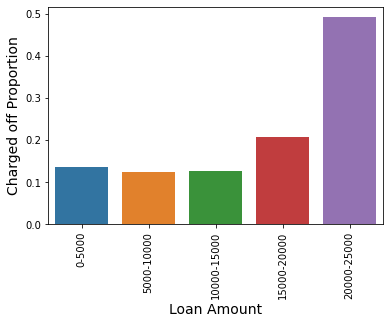

In [56]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Loan Amount',fontsize=14)
plt.show()

Observation 
* Loan amount of 20000+ has high chances of charged off.

##### Interest Rate as driving Variable

In [57]:
df.int_rate.describe()

count    30789.000000
mean        11.204086
std          3.187047
min          5.420000
25%          8.380000
50%         11.140000
75%         13.570000
max         17.880000
Name: int_rate, dtype: float64

In [58]:
# categorise intrest rates into buckets.
df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 5, 10, 13, 16, 20], labels=['0-5', '5-10', '10-13', '13-16', '16 +'])
df['int_rate_cats'].value_counts()

5-10     11337
10-13     9797
13-16     7516
16 +      2139
0-5          0
Name: int_rate_cats, dtype: int64

In [59]:
interest_vs_loan = df.groupby([ 'int_rate_cats', 'loan_status'])
df_cross = interest_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
int_rate_cats,,,,
0-5,0,0,0,NaN
5-10,795,0,10542,0.070124
10-13,1432,0,8365,0.146167
13-16,1453,0,6063,0.193321
16 +,611,0,1528,0.285647


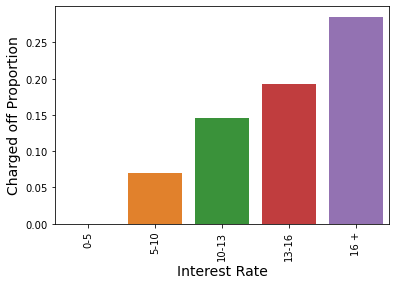

In [60]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Interest Rate',fontsize=14)
plt.show()

Observations:
* Intrest rates are starting from minimin 5 %.
* Interest rate less than 10% has very less chances of charged off. 
* Interest rate more than 16% has very high chances of charged off.
* Charged off proportion is increasing with higher intrest rates.

##### DTI (ratio of total monthly debt payments to the total debt obligations) as driving Variable

In [61]:
# categorise dti into buckets.
df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])
df['dti_cats'].value_counts()

10-15    7663
15-20    6977
05-10    6204
25+      5364
0-5      3909
Name: dti_cats, dtype: int64

In [62]:
dti_vs_loan = df.groupby([ 'dti_cats', 'loan_status'])
df_cross = dti_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
dti_cats,,,,
0-5,459,0,3450,0.117421
05-10,751,0,5453,0.121051
10-15,1066,0,6597,0.139110
15-20,1039,0,5938,0.148918
25+,877,0,4487,0.163497


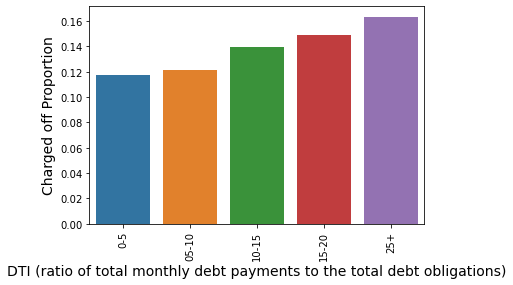

In [63]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('DTI (ratio of total monthly debt payments to the total debt obligations)',fontsize=14)
plt.show()

Observation
* As DTI increases chances of charged off applicants increases

###### Annual Income as driving variable

In [64]:
df['annual_inc'].describe()

count     30789.000000
mean      56795.745547
std       25200.165215
min        4000.000000
25%       38000.000000
50%       52392.000000
75%       72000.000000
max      129996.000000
Name: annual_inc, dtype: float64

In [65]:
# categorise annual incomes into buckets.
df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,100000,120000,140000], 
                                 labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000-120000', '120000+'])
df['annual_inc_cats'].value_counts()

40000-60000      10002
20000-40000       8130
60000-80000       6171
80000-100000      3382
100000-120000     1604
0-20000           1144
120000+            356
Name: annual_inc_cats, dtype: int64

In [66]:
income_vs_loan = df.groupby([ 'annual_inc_cats', 'loan_status'])
df_cross = income_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
annual_inc_cats,,,,
0-20000,224,0,920,0.195804
20000-40000,1373,0,6757,0.168881
40000-60000,1425,0,8577,0.142472
60000-80000,739,0,5432,0.119754
80000-100000,354,0,3028,0.104672
100000-120000,136,0,1468,0.084788
120000+,40,0,316,0.112360


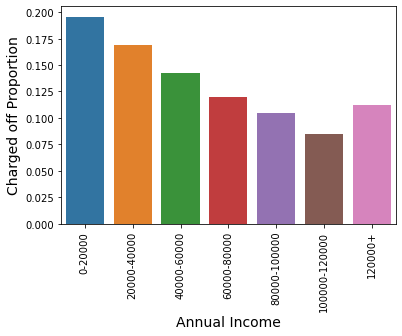

In [67]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Annual Income',fontsize=14)
plt.show()

Observation
* Income range (0-20000) has high chances of charged off.
* With increase in annual income charged off chances decreases.
* 120000+ bucket has slightly higher as it comprises huge income range

###### Purpose as driving variable

In [68]:
purpose_vs_loan = df.groupby([ 'purpose', 'loan_status'])
df_cross = purpose_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
purpose,,,,
car,148,0,1245,0.106246
credit_card,421,0,3649,0.103440
debt_consolidation,2033,0,11869,0.146238
educational,52,0,250,0.172185
home_improvement,262,0,1877,0.122487
house,38,0,237,0.138182
major_purchase,194,0,1691,0.102918
medical,91,0,494,0.155556
moving,82,0,418,0.164000


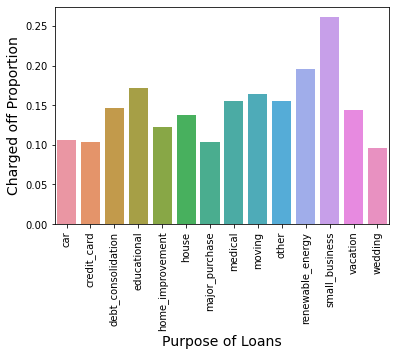

In [69]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Purpose of Loans',fontsize=14)
plt.show()

Observations:
* Small Business applicants have high chances of getting charged off.
* Renewable_energy and educational applicants are next categories where charge off is high

###### Grade as driving variable

In [70]:
grade_vs_loan = df.groupby([ 'grade', 'loan_status'])
df_cross = grade_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
grade,,,,
A,581,0,8724,0.062440
B,1286,0,8562,0.130585
C,1212,0,5361,0.184391
D,919,0,2992,0.234978
E,282,0,831,0.253369
F,11,0,28,0.282051


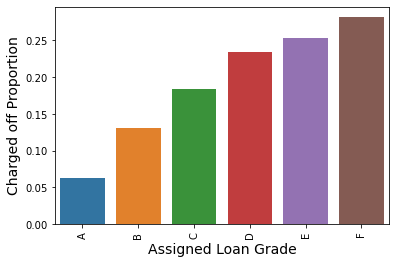

In [71]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Assigned Loan Grade',fontsize=14)
plt.show()

Observations:
* Grade "A" has minimum chances of charged off.
* Grade "F" have maximum chances of charged off.
* Chances of charged of is increasing with grade moving from "A" towards "F"

###### Sub Grade as driving variable

In [72]:
subgrade_vs_loan = df.groupby([ 'sub_grade', 'loan_status'])
df_cross = subgrade_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
sub_grade,,,,
A1,30,0,1049,0.027804
A2,73,0,1343,0.051554
A3,98,0,1591,0.058022
A4,169,0,2444,0.064677
A5,211,0,2297,0.084131
B1,165,0,1459,0.101601
B2,210,0,1510,0.122093
B3,303,0,2028,0.129987
B4,293,0,1741,0.144051


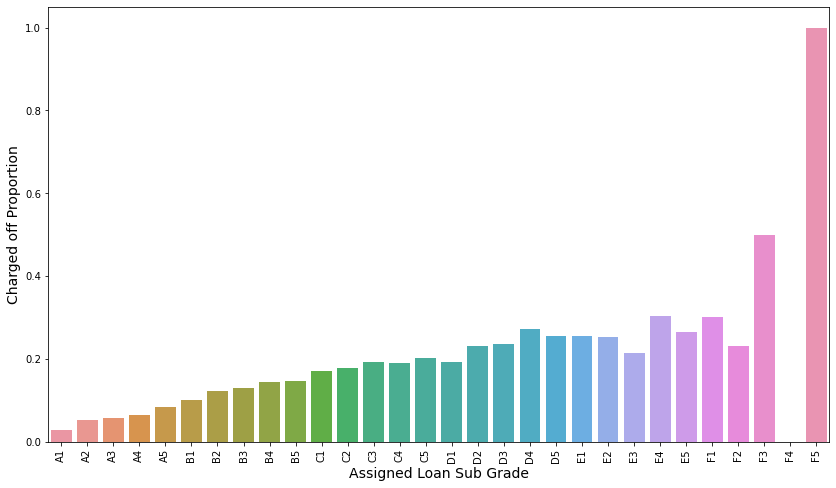

In [73]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Assigned Loan Sub Grade',fontsize=14)
plt.show()

Observations:
* Sub Grades of "A" has minimum chances of charged off.
* Sub Grades of "F" especially F2 has higher chances of charged off.
* Proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "F"

###### Employment Length as driving variable

In [74]:
emp_length_vs_loan = df.groupby([ 'emp_length', 'loan_status'])
df_cross = emp_length_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
emp_length,,,,
0,201,0,723,0.217532
1,876,0,5599,0.135290
2,456,0,3124,0.127374
3,437,0,2828,0.133844
4,357,0,2365,0.131154
5,350,0,2214,0.136505
6,233,0,1489,0.135308
7,199,0,1148,0.147736
8,156,0,975,0.137931


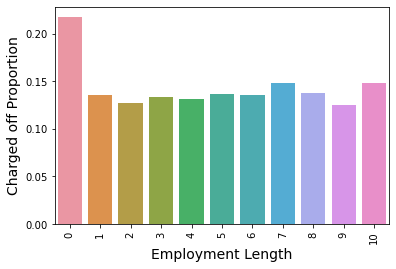

In [75]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Employment Length',fontsize=14)
plt.show()

Observation
* Employment length of less than one year has highest proportion of charged off loan applicants.

###### Home ownership as driving variable

In [76]:
home_vs_loan = df.groupby([ 'home_ownership', 'loan_status'])
df_cross = home_vs_loan.loan_status.count()[lambda x: x >= 10]
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Fully Paid,Charged Off prop
home_ownership,,,
MORTGAGE,1647,10853,0.131760
OTHER,16,71,0.183908
OWN,351,2147,0.140512
RENT,2277,13424,0.145023


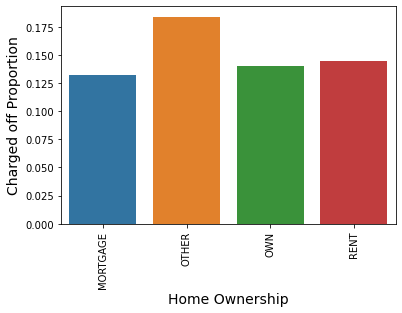

In [77]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Home Ownership',fontsize=14)
plt.show()

Observation
* Charge off chances is less in case of mortgaged homes
* Charge off chances are more in case of other categories

###### Loan term as driving variable

In [78]:
term_vs_loan = df.groupby([ 'term', 'loan_status'])
df_cross = term_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
term,,,,
36 months,2868,0,22411,0.113454
60 months,1423,0,4087,0.258258


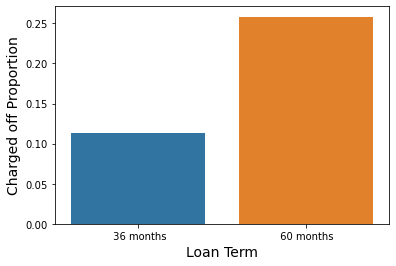

In [79]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Loan Term',fontsize=14)
plt.show()

Observation
* Charge off significantly higher in case of 60 months loan term

###### Verification status as driving variable

In [80]:
veri_vs_loan = df.groupby([ 'verification_status', 'loan_status'])
df_cross = veri_vs_loan.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
verification_status,,,,
Not Verified,1954,0,13445,0.126891
Source Verified,1104,0,6934,0.137348
Verified,1233,0,6119,0.167709


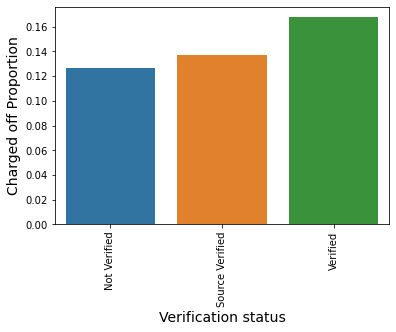

In [81]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Verification status',fontsize=14)
plt.show()

Observation
* Verified loan applications has slightly higher chances of charged off

###### Public Record Bankrupties as driving variable

In [82]:
pub_rec_bankrupt = df.groupby([ 'pub_rec_bankruptcies', 'loan_status'])
df_cross = pub_rec_bankrupt.loan_status.count()
df_unstacked = df_cross.unstack()
df1 = df_unstacked.fillna(0)
df1.columns=df1.columns.astype('str')
df1.reset_index()
df1['Charged Off prop'] = df1['Charged Off']/(df1['Fully Paid']+df1['Charged Off'])
df1

loan_status,Charged Off,Current,Fully Paid,Charged Off prop
pub_rec_bankruptcies,,,,
0.0,3900,0,24909,0.135374
1.0,289,0,1081,0.210949
2.0,2,0,2,0.500000
Not Known,100,0,506,0.165017


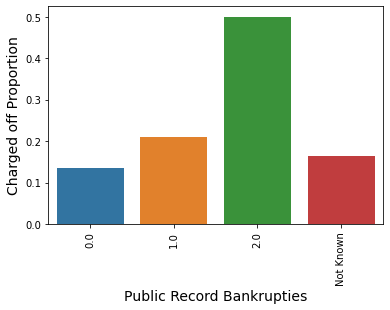

In [83]:
ax1=sns.barplot(y='Charged Off prop', x=df1.index, data=df1)
plt.xticks(rotation=90)
plt.ylabel('Charged off Proportion',fontsize=14)
plt.xlabel('Public Record Bankrupties',fontsize=14)
plt.show()

Observation
* Higher number of Public Record Bankrupties results in higher rate of Charged off applicants

### Bivariate Analysis between significant driving variables

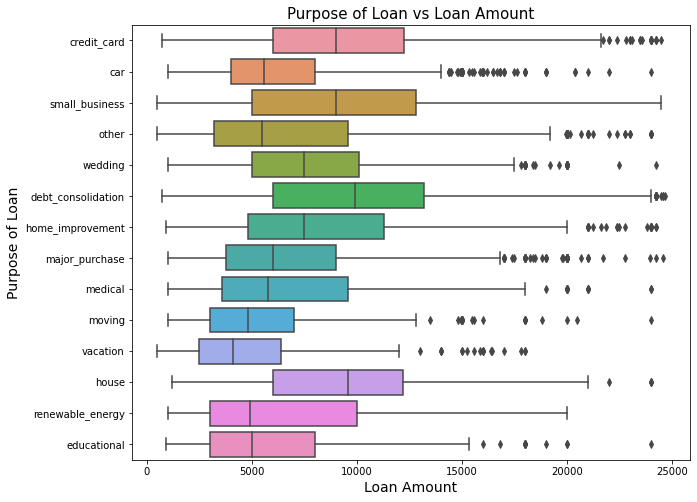

In [84]:
# Puprose of loan vs Loan amount
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data=df)
plt.title('Purpose of Loan vs Loan Amount',fontsize=15)
plt.ylabel('Purpose of Loan',fontsize=14)
plt.xlabel('Loan Amount',fontsize=14)
plt.show()

Observations
* Loan amount is highest for loan taken for debt consolidation and small business purpose.

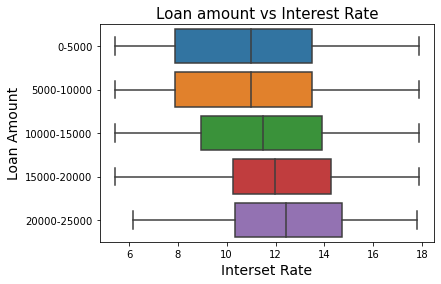

In [85]:
# Loan amount vs Interest Rate

ax = sns.boxplot(x='int_rate', y='loan_amnt_cats', data=df)
plt.title('Loan amount vs Interest Rate',fontsize=15)
plt.ylabel('Loan Amount',fontsize=14)
plt.xlabel('Interset Rate',fontsize=14)
plt.show()

Observation
* Interest rates increases with increase in loan amount.
* Higher interset rate leads to higher proportion of charged off applicants for higher loan amounts

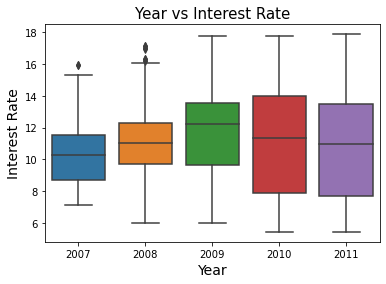

In [86]:
# Interest Rate vs Year
ax = sns.boxplot(y='int_rate', x='year', data =df)
ax.set_title('Year vs Interest Rate',fontsize=15)
ax.set_ylabel('Interest Rate',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.show()

Observation
* Interest rate has no specific trend with increasing year

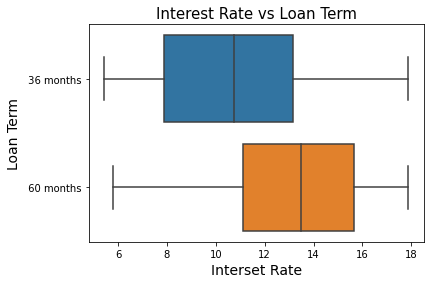

In [87]:
# Interest Rate vs Loan Term
ax = sns.boxplot(x='int_rate', y='term', data=df)
plt.title('Interest Rate vs Loan Term',fontsize=15)
plt.ylabel('Loan Term',fontsize=14)
plt.xlabel('Interset Rate',fontsize=14)
plt.show()

Observation
* Interest rate is higher in case of 60 months loan term
* Higher interset rate leads to higher proportion of charged off applicants in 60 month term

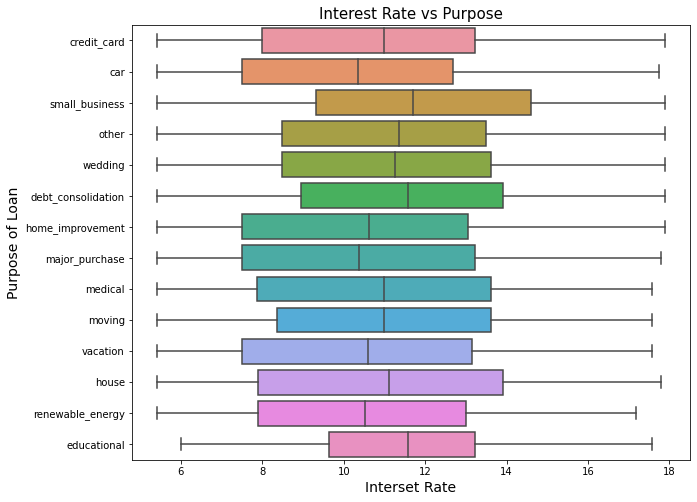

In [88]:
# Purpose vs Interest Rate
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='int_rate', y='purpose', data=df)
plt.title('Interest Rate vs Purpose',fontsize=15)
plt.ylabel('Purpose of Loan',fontsize=14)
plt.xlabel('Interset Rate',fontsize=14)
plt.show()

Observation 
* Interest rate is highest in case of small business, and higher in debt consolidation and educational purposes.
* Higher interset rate leads to higher proportion of charged off applicants for loan applicants for purpose of small business.

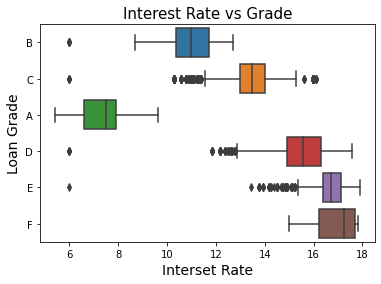

In [89]:
# Grade vs Interest Rate
ax = sns.boxplot(x='int_rate', y='grade', data=df)
plt.title('Interest Rate vs Grade',fontsize=15)
plt.ylabel('Loan Grade',fontsize=14)
plt.xlabel('Interset Rate',fontsize=14)
plt.show()

Observation
* Interest rate increases significantly as grade increases from A to F.
* Higher interset rate leads to higher proportion of charged off applicants.

## Observations

We can see that fully paid comprises 84.5%, defaulters are 13.6% and that of current is 1.71%.

The 'current' ones are neither fully paid not defaulted, so let's get rid of the current loans as this wont contribute to our analysis.

##### Results obtained from Univariate Analaysis

* Distribution of amounts for Loan Amount, Funded Amount and Funded Amount Investment looks very much similar. Hence, we can work with only loan amount column for rest of our analysis.
* Maximum loan applicants have their annual income in range 30000-80000.
* Most of the total payment are in range of 5000-13000.
* Maximum loan applicants have Interest Rates on loans in the range of 10% - 15%.
* Most of the loans taken for debt consolidation(45.15%) and Credit card bill payment (13.21%). Other (10.8%) is also one of the main area where loans were taken and then the home improvement is another major reason (6.94%)
* When home ownership is considered, applicant numbers are highest for those living in rented home. Next highest loan applicants are those who mortgazed their home. While others category have least numbers of applicants.
* Number of loan applications is maximum for grade A and B. Also Loan defaulters are comparatively less for grade A. And Number of loan applications then gradually decreases from B to F.
* Count of Loan applicants reduces from subgrades A to subgrades F
* There is increase in count of loan application with each passing year. This observation holds true except for May-October in the year 2008, reason for this can be recession. Hence, increase in number of loan applications may lead to increased number of charged off applications.
* The loan term plot suggests that loan repayment term of 36 months has higher count of loan applicant as compared to loan repayment term of 60 months.
* Loan verification Status plot shows 'Not verified' loan applications are highest in numbers. 'Verified' loan applications are less in numbers
* Less count of loan applications is seen for employment length less than an year. Maximum count of laon applicants are observed for employment length of 1 year, hence can have maximum defaulters as well. And this count of loan applications gradually reduces from employment length of 2 year to 9 year. Then Surge in count of loan applications is observed for employment length 10 years+. Reason for huge loan application for employment length of 1 year can be debt_consolidation which contributes 45% to loan purpose Reason for huge loan application for employment length of 10+ year can be numerous like home improvement, major purchase, etc. Further, 10+ year buckets covers remaining employment length so has huge count

##### Results obtained from Bivariate Analaysis

* Loan amount of 20000+ has high chances of charged off.
* Intrest rates are starting from minimin 5 %. Interest rate less than 10% has very less chances of charged off. Interest rate more than 16% has very high chances of charged off. Charged off proportion is increasing with higher intrest rates.
* As DTI increases chances of charged off applicants increases
* Income range (0-20000) has high chances of charged off. With increase in annual income charged off chances decreases. 120000+ bucket has slightly higher as it comprises huge income range
* Small Business applicants have high chances of getting charged off. Renewable_energy and educational applicants are next categories where charge off is high
* Grade "A" has minimum chances of charged off. Grade "F" have maximum chances of charged off. Chances of charged of is increasing with grade moving from "A" towards "F"
* Sub Grades of "A" has minimum chances of charged off. Sub Grades of "F" especially F2 has higher chances of charged off. Proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "F"
* Employment length of less than one year has highest proportion of charged off loan applicants.
* Charge off chances is less in case of mortgaged homes. Charge off chances are more in case of other categories
* Charge off significantly higher in case of 60 months loan term
* Verified loan applications has slightly higher chances of charged off
* Higher number of Public Record Bankrupties results in higher rate of Charged off applicants
* Loan amount is highest for loan taken for debt consolidation and small business purpose.
* Interest rates increases with increase in loan amount. 
* Interest rate is higher in case of 60 months loan term
* Interest rate is highest in case of small business, and higher in debt consolidation and educational purposes.
* Interest rate increases significantly as grade increases from A to F.

## Conclusions

* Charged off proportion increases with increase in interest rates. Interest rate more than 16% has very high chances of charged off. 
* Interest rates increases with increase in loan amount. Consequently, Loan amount of 20000+ has high chances of charged off.
* With respect to purpose of Loan, "Small Business" applicants have high chances of getting charged off. "Renewable_energy" and "educational applicants" are next categories where charge off is high. Reason for "Small Business" applicants have highest chances of getting charged off can be increased interest rate for "Small Business".
* With increase in annual income charged off proportion decreases. Income range (0-20000) has high chances of charged off.
* While loan applications gradually decreases from A to F, Proportion of charged off applicants increases with grade moving from "A" towards "F", implying Grade "A" has minimum chances of charged off and Grade "F" has maximum chances of charged off.
* Proportion of charged off applicants increases with sub grades moving from sub grades of "A" towards sub grades of "F", while Count of Loan applicants reduces from subgrades A to subgrades F.
* Reason for increasing proportion of charged off applicants while moving from grade "A" towards grade "F" can be attributed to increasing interest rate as grade increases from A to F.
* Employment length of less than one year has highest proportion of charged off loan applicants.  Here, Maximum count of loan applicants are observed for employment length of 1 year, hence have maximum defaulters as well.
* When home ownership is considered, applicant numbers are highest for those living in rented home. Next highest loan applicants are those who mortgaged their home. While others category have least numbers of applicants. But Charge off chances is less in case of mortgaged homes. Charge off chances are more in case of other categories.
* As DTI increases chances of charged off applicants increases.
* Charge off applicants numbers are significantly higher in case of 60 months loan term while applicants with loan repayment term of 36 months are higher in count. Interest rate is higher in case of 60 months loan term, leading to increased Charged off applicants.
* Higher number of Public Record Bankruptcies results in higher rate of Charged off applicants.
